In [1]:
# Import necessary libraries
from PIL import Image
import requests
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor
from transformers import BitsAndBytesConfig
import torch

In [2]:
# Define model ID
model_id = "microsoft/Phi-3-vision-128k-instruct"

# Load processor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

# Define BitsAndBytes configuration for 4-bit quantization
nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Load model with 4-bit quantization and map to CUDA
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda",
    trust_remote_code=True,
    torch_dtype="auto",
    quantization_config=nf4_config,
)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
# Define initial chat message with image placeholder
messages = [{"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"}]


In [5]:
# Download image from URL
url = "https://images.unsplash.com/photo-1528834342297-fdefb9a5a92b?ixlib=rb-4.0.3&q=85&fm=jpg&crop=entropy&cs=srgb&dl=roonz-nl-vjDbHCjHlEY-unsplash.jpg&w=640"
image = Image.open(requests.get(url, stream=True).raw)


In [6]:
# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

In [7]:
# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")


In [8]:
# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

In [10]:
# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

In [11]:
# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

In [12]:
# Print the generated response
print(response)

The image shows a single yellow flower with a green stem against a blue background.


# Transcribe from image

In [14]:
messages = [{"role": "user", "content": "<|image_1|>\nOCR the text of the image as is. OCR:"}]
url = "https://i.postimg.cc/fRFvFVyv/Screenshot-from-2024-05-22-20-55-43.png"
image = Image.open(requests.get(url, stream=True).raw)

In [15]:
# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

In [16]:
# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")


In [17]:
# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

In [18]:
# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

In [19]:
# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

print(response)

3 
EXPERIMENTS
We show Position Interpolation can effectively extend context window up to 32 times of the original 
size, and such extension can be done with only several hundreds of training steps. We show the 
resulting models are strong LLMs with fully effective long context windows. We demonstrate its 
performance in a number of tasks including language modeling, passkey retrieval, and long doc-
ument summarization. We also present benchmark results of the extended models on the original 
LLaMA evaluation benchmarks.


# Describe the image

In [21]:
messages = [{"role": "user", "content": "<|image_1|>\nWhat is this image of?"}]
url = "https://i.postimg.cc/q7Wjtj3n/Screenshot-from-2024-05-22-20-56-56.png"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

print(response)

This image shows a plush toy resembling a character from a popular animated television series. The toy is wearing a hooded outfit and has a pair of glasses. It is attached to a red and black backpack with a silver zipper.


# Parse the table

In [22]:
messages = [{"role": "user", "content": "<|image_1|>\nExtract the table content of the table in JSON format: "}]
url = "https://i.postimg.cc/W1YwqXk8/Screenshot-from-2024-05-22-21-41-03.png"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

print(response)

```json
{
  "Benchmark": ["MMMU", "MMBench", "ScienceQA"],
  "Phi-3 Vision-128K-In1": [40.2, 80.5, 90.8],
  "LaVA-1.6 Vicuna-7B": [34.2, 76.3, 70.6],
  "QWEN-VL Chat": [39.0, 75.8, 67.2]
}
```


# Figure understanding

In [23]:
messages = [{"role": "user", "content": "<|image_1|>\nWhat is this figure about? "}]
url = "https://i.postimg.cc/Y0sRQR4Q/Screenshot-from-2024-05-22-21-47-39.png"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

print(response)

The figure is a bar chart comparing the performance of various machine learning models, with each model represented by a pair of stacked bars indicating the performance of the base model and the fine-tuned model.


# Reading Comprehension on Scanned Documents
The goal is to ask questions about scanned or photographed text. This differs from Optical Character Recognition (OCR) in that we are not interested in simply transcribing the text. Instead, we want to assess whether the model can understand the written content and answer questions about it directly.

The image shows the cover of a book titled 'SAM TALLENT RUNNING THE LIGHT' with a synopsis about a comedian named Billy Ray Schafer who is dealing with personal and professional challenges. The book appears to be a fictional representation of a comedian's life, exploring themes of debauchery, divorce, and the search for meaning in a troubled career.


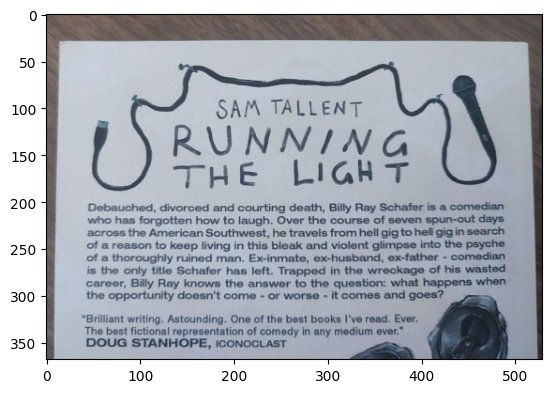

In [25]:
messages = [{"role": "user", "content": "<|image_1|>\nWhat is this book about? "}]
url = "https://i.postimg.cc/rmHxPbQY/Screenshot-from-2024-05-22-20-56-21.png"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

import matplotlib.pyplot as plt
plt.imshow(image)
print(response)

# Set-of-Mark Prompting
Set-of-Mark (SoM) prompting uses interactive segmentation models to divide an image into regions and mark them with symbols, enabling large multimodal models to better understand and answer visually grounded

Object number 4 is a cactus with orange flowers in a pot.


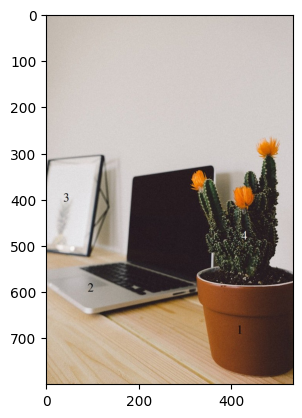

In [27]:
messages = [{"role": "user", "content": "<|image_1|>\nWhat is object number 4? "}]
url = "https://i.postimg.cc/fy0Lz798/scott-webb-p-0l-WFknspg-unsplash-2.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

import matplotlib.pyplot as plt
plt.imshow(image)
print(response)